## Linear Regression with different Packages

Load the packages

In [23]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
#To override all of matplotlib styles with seaborns use sns.set()
sns.set()

### Import Dataset

In [24]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [25]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### First Regression

#### Define the Dependent and Independent Variables

In [7]:
y = data['GPA']
x1 = data['SAT']

#### Plot the variables

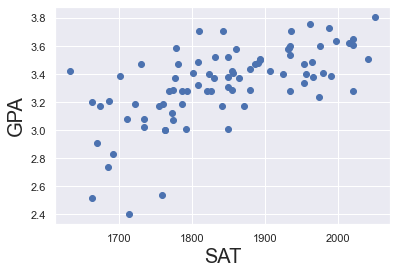

In [8]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           7.20e-11
Time:                        22:41:00   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

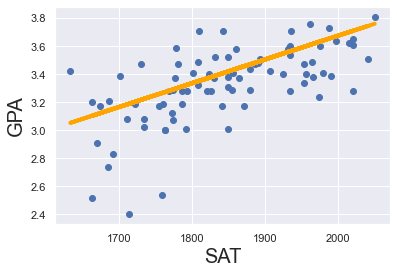

In [11]:
plt.scatter(x1,y)
yhat = 0.0017 * x1 + 0.2750
fig = plt.plot(x1, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [13]:
0.0017 * 1850 

3.145

### Multiple Linear Regression with SM Package

Import dataset

In [17]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [18]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


Regression

In [19]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           6.58e-10
Time:                        20:58:30   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression with Sklearn

In [26]:
data = pd.read_csv('1.01. Simple linear regression.csv')

Declare the dependent (target) and independent variables (features)

In [27]:
#Target
y = data['GPA']
#Feature
x = data['SAT']

Verify shapes of target and features

In [28]:
x.shape

(84,)

In [29]:
y.shape

(84,)

Reshape the dimension of X

In [31]:
##When you know the exact dimensions
#x_matrix = x.values.reshape(84,1)

#Smarter approach that applies to any shape
x_matrix = x.values.reshape(-1,1)

Regression

In [30]:
reg = LinearRegression()

In [32]:
reg.fit(x_matrix,y)

LinearRegression()

#### R-Squared

In [33]:
reg.score(x_matrix,y)

0.40600391479679765

####  Coefficient

In [34]:
reg.coef_

array([0.00165569])

#### Intercept

In [35]:
reg.intercept_

0.2750402996602803

#### Making Predictions

In [38]:
new_data = pd.DataFrame(data=[1750, 1760], columns = ['SAT'])
new_data

,SAT
0,1750
1,1760


In [39]:
reg.predict(new_data)

array([3.17249439, 3.18905127])

In [40]:
new_data['Predicted_GPA'] = reg.predict(new_data)

In [41]:
new_data

,SAT,Predicted_GPA
0,1750,3.172494
1,1760,3.189051


#### Regression Plot

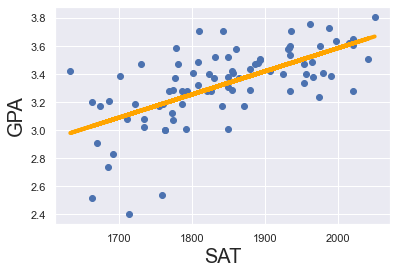

In [44]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

### Multiple Linear Regression

In [45]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

Declare the Dependent and Independent

In [46]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

Declare the LinearRegression Class

In [47]:
reg = LinearRegression()

Fit the Regression

In [48]:
#No need to reshape inputs because Sklearn is optiized for multiple linear regression
reg.fit(x,y)

LinearRegression()

Coefficients of the independent variables

In [49]:
reg.coef_

array([ 0.00165354, -0.00826982])

Intercept

In [51]:
reg.intercept_

0.29603261264909486

Calculating the R-Squared

In [52]:
reg.score(x,y)

0.40668119528142843

#### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [53]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1 - (1-r2) * (n-1)/(n-p-1)

In [58]:
def adjusted_r(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2) * (n-1)/(n-p-1)
    return adjusted_r2

In [59]:
adjusted_r(x,y)

0.39203134825134023

## Feature Selection through P-values

In [60]:
from sklearn.feature_selection import f_regression

In [61]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [63]:
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0.   , 0.676])

### Creating a Summary Table

In [73]:
reg_summary = pd.DataFrame(data=x.columns.values, columns =['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [76]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [83]:
reg_summary

,Features,Coefficients,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


## Feature Selection through Feature Scaling (Normalization/Standardization)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
scaler.fit(x)

StandardScaler()

Standardization

In [87]:
x_scaled = scaler.transform(x)

In [88]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

#### Regression with scaled features

In [89]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [90]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [91]:
reg.intercept_

3.330238095238095

In [95]:
#Bias = Intercept
reg_summary = pd.DataFrame(data = [['Bias'], ['SAT'], ['Rand 1,2,3']], columns =['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [96]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030
